In [ ]:
import numpy as np
import pandas as pd

import torch
import fastai

from fastai.vision.all import *
from ipywidgets import widgets

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

torch.__version__, fastai.__version__

('1.13.0+cu116', '2.7.10')

In [ ]:
!git clone https://github.com/Xbeck/Pnevmoniya.git

Cloning into 'Pnevmoniya'...
remote: Enumerating objects: 5849, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5849 (delta 0), reused 4 (delta 0), pack-reused 5844
Receiving objects: 100% (5849/5849), 1.13 GiB | 34.57 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (5846/5846), done.


In [ ]:
# data
path = Path('/content/Pnevmoniya/Dataset/train')


fls = get_image_files(path)

In [ ]:
# Data Block yaratib olamiz
pnevmoniya = DataBlock(
                        blocks=(ImageBlock, CategoryBlock),    # kategoriyalarga ajratish uchun
                        get_items=get_image_files,    # fayllarni qayerdan olishini ko'rsatamiz
                        splitter=RandomSplitter(valid_pct=0.2, seed=12),  # seed-random state, train_size=0.8, test_size=0.2
                        get_y=parent_label,   # rasmlarni bo'lganda fastai o'zi yorliq berib ketadi
                        item_tfms=Resize(224) # rasmlar o'lchamini o'zgartirish
                        )

In [ ]:
# Data Loader yaratib olamiz
dls = pnevmoniya.dataloaders(path)

In [ ]:
failed = verify_images(path)
failed

zip argument #1 must support iteration


(#0) []

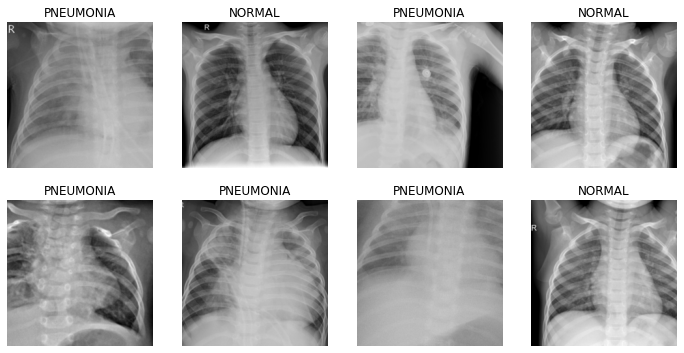

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
# o'qitish(training)
# learn = cnn_learner(dls, resnet34, metrics=accuracy)    # cnn_learner  modelning nomi >> vision_learner ga o'zgargan
# learn = vision_learner(dls, resnet34, metrics=accuracy)

# resnet34

In [ ]:
# model resnet34 ni o'qitishga tayyorgarlik
learn_34 = vision_learner(dls, resnet34, metrics=accuracy)   #  fine_tune= 6 - , accuracy 0.993289 >> 0.

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0012022644514217973)

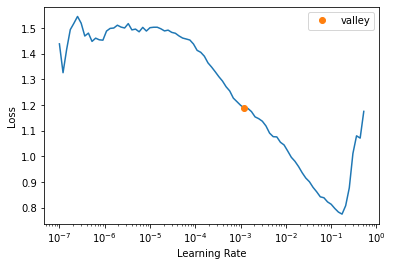

In [ ]:
# train tezligini aniqlash: resnet34  -- modeli uchun
learn_34.lr_find()

In [ ]:
# model resnet50 ni tafsiya qilingan(aniqlangan) learning tezligi bilan o'qitish
learn_34.fine_tune(6, 0.001)
learn_34

epoch,train_loss,valid_loss,accuracy,time
0,0.588002,0.292305,0.909875,01:32


epoch,train_loss,valid_loss,accuracy,time
0,0.210196,0.137485,0.953979,01:33
1,0.118795,0.122574,0.968360,01:34
2,0.079509,0.050578,0.978907,01:33
3,0.040082,0.106716,0.971237,01:35
4,0.024443,0.060988,0.979866,01:33
5,0.016980,0.057720,0.981783,01:33


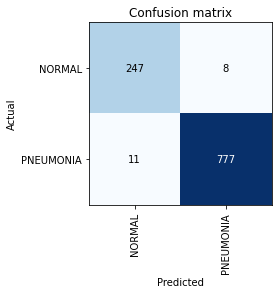

In [ ]:
# Tekshirish
interp = ClassificationInterpretation.from_learner(learn_34)
interp.plot_confusion_matrix()

In [ ]:
# # modelni saqlab olish
# learn_34.export("pnevmoniya_34_model.pkl")

# resnet50

In [ ]:
# model resnet50 ni o'qitishga tayyorgarlik
learn_50 = vision_learner(dls, resnet50, metrics=accuracy)   #  fine_tune= 4 - 6 - 7 - 10, accuracy 0.990412 >> 0.9932 >> 0.991371 >> 0.990412

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0004786300996784121)

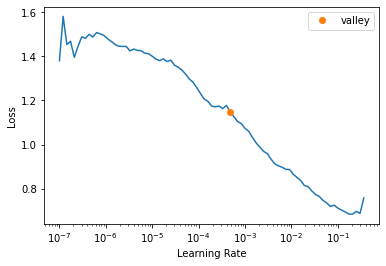

In [ ]:
# train tezligini aniqlash: resnet50  -- modeli uchun
learn_50.lr_find()

In [ ]:
# model resnet50 ni tafsiya qilingan(aniqlangan) learning tezligi bilan o'qitish
learn_50.fine_tune(13, 0.00047)
learn_50

epoch,train_loss,valid_loss,accuracy,time
0,0.025829,0.092518,0.979866,01:38


epoch,train_loss,valid_loss,accuracy,time
0,0.021545,0.107538,0.976031,01:41
1,0.021551,0.075939,0.978907,01:42
2,0.024830,0.101881,0.976031,01:40
3,0.026768,0.136740,0.969319,01:42
4,0.023170,0.116760,0.974113,01:41
5,0.018878,0.125586,0.978907,01:41
6,0.014833,0.061361,0.981783,01:42
7,0.008701,0.075354,0.982742,01:41
8,0.007028,0.069744,0.982742,01:42
9,0.007878,0.079648,0.983701,01:40


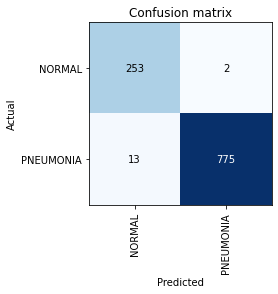

In [ ]:
# Tekshirish
interp = ClassificationInterpretation.from_learner(learn_50)
interp.plot_confusion_matrix()

In [ ]:
# # modelni saqlab olish
# learn_50.export("pnevmoniya_50_model.pkl")

# resnet101

In [ ]:
# model resnet101 ni o'qitishga tayyorgarlik
learn_101 = vision_learner(dls, resnet101, metrics=accuracy)   #  fine_tune= 6 - , accuracy 0.993289 >> 0.

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0008317637839354575)

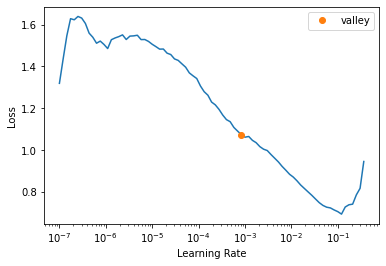

In [ ]:
# # train tezligini aniqlash: resnet101  -- modeli uchun
learn_101.lr_find()

In [ ]:
# model resnet101 ni tafsiya qilingan(aniqlangan) learning tezligi bilan o'qitish
learn_101.fine_tune(7, 0.008)
learn_101

epoch,train_loss,valid_loss,accuracy,time
0,0.300948,0.152625,0.947267,01:46


epoch,train_loss,valid_loss,accuracy,time
0,0.119117,0.058367,0.982742,01:52
1,0.095075,0.143783,0.963567,01:54
2,0.086242,0.385751,0.927133,01:52
3,0.061469,0.084880,0.975072,01:54
4,0.038168,0.051702,0.990412,01:53
5,0.021076,0.026179,0.990412,01:53
6,0.008922,0.026077,0.990412,01:53


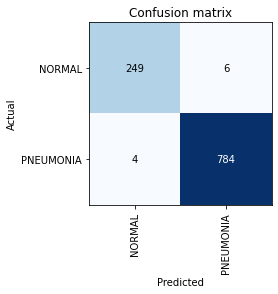

In [ ]:
# Tekshirish
interp = ClassificationInterpretation.from_learner(learn_101)
interp.plot_confusion_matrix()

In [ ]:
# # modelni saqlab olish
# learn_101.export("pnevmoniya_101_model.pkl")

In [ ]:
# Rasm yuklash uchun widget(tugma)

upload = widgets.FileUpload()
upload

In [ ]:
sample_solution = pd.read_csv('/content/Pnevmoniya/Dataset/sample_solution.csv')
sample_solution

In [ ]:
import cv2
for i in range(0, 624):
  print(i)
  label = sample_solution.iloc[i, 0]
  img = cv2.imread('/content/Pnevmoniya/Dataset/test/'+label)    # PILImage.create
  # img = PILImage.create('/content/Pnevmoniya/Dataset/test/'+label)
  pred, _, prob = learn_34.predict(img)
  sample_solution.iloc[i, 1] = pred

In [ ]:
prob

In [ ]:
# modelni saqlab olish
with open('learn_34_model.pkl','wb') as f:
    pickle.dump(learn_34, f)

In [ ]:
label_mapping = {"PNEUMONIA": 1, "NORMAL": 0}
sample_solution["labels"] = sample_solution["labels"].map(label_mapping)

In [ ]:
sample_solution.to_csv("sample_solution_34.csv", index=False)

In [ ]:
sample_solution["labels"] = 0

In [ ]:
sample_solution

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0
